In [1]:
from enterosig.denovo import rank_selection, decompositions, plot_rank_selection
import pandas as pd
import logging

<Figure size 100x100 with 0 Axes>

## Read Crohns Atlas data

In [2]:
gca = pd.read_csv("/Users/pez23lof/Documents/cellgen/gut_cell_atlas/crohns_cell_tables/count.tsv",
                  index_col=0,
                  sep="\t")
print(gca.shape)
gca.head()

(67, 225)


,H101694_E,H101694_L,H102141_E,H102141_L,H106265_N,H110216_E,H110216_L,H139073_N,H152638_L,H157844_E,...,N46_LP_A,N46_LP_B,N51_Epi_A,N51_Epi_B,N51_LP_A,N51_LP_B,N8_Epi_A,N8_Epi_B,N8_LP_A,N8_LP_B
Celltype,,,,,,,,,,,,,,,,,,,,,
Activated fibroblasts CCL19 ADAMADEC1,0.0,1.0,0.0,3.0,2.0,0.0,0.0,6.0,11.0,0.0,...,11.0,3.0,0.0,0.0,22.0,21.0,0.0,0.0,1.0,6.0
B cells,0.0,145.0,1.0,387.0,11.0,1.0,21.0,43.0,550.0,0.0,...,94.0,29.0,2.0,0.0,1857.0,44.0,0.0,0.0,10.0,1.0
B cells AICDA LRMP,0.0,15.0,0.0,10.0,0.0,1.0,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,0.0
Cycling cells,2.0,20.0,1.0,27.0,0.0,2.0,5.0,0.0,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC1,0.0,4.0,0.0,5.0,10.0,0.0,21.0,11.0,9.0,0.0,...,26.0,34.0,0.0,0.0,9.0,14.0,0.0,0.0,2.0,5.0


In [3]:
gca_meta = pd.read_csv("/Users/pez23lof/Documents/cellgen/gut_cell_atlas/crohns_cell_tables/sample_metadata.tsv",
                       sep="\t",
                       index_col=0)
# Reorder to match cell table ordering
gca_meta = gca_meta.loc[gca.columns]
gca_meta.head()
assert gca_meta.shape[0] == gca.shape[1], "Data and metadata dimensions do not match"

## Rank Selection

In [18]:
rank_sel_results = rank_selection(x=gca / gca.sum(),
                                  ranks=list(range(2, 13)),
                                  shuffles=100,
                                  seed=4298)

100%|████████████████████████████████████████████████████████████████████| 1100/1100 [02:39<00:00,  6.91it/s]


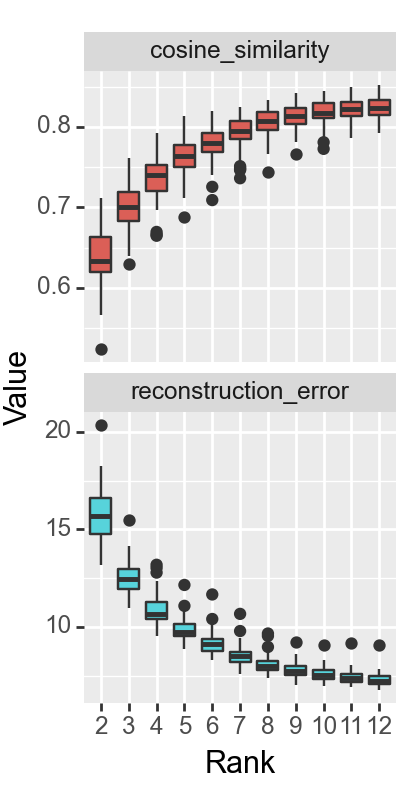

In [23]:
plt_f = plot_rank_selection(
    rank_sel_results,
    jitter=False,
    n_col=1, exclude=['l2_norm', 'sparsity_h', 'sparsity_w', 'rss', 'r_squared']
).draw()
plt_f.set_size_inches(2, 4)
plt_f

## Examine decompositions

In [6]:
decomps = decompositions(
    x=gca,
    ranks=[6, 7, 8],
    random_starts=20,
    seed=4298
)

100%|████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 62.21it/s]


In [7]:
best_decomp = decomps[8][0]

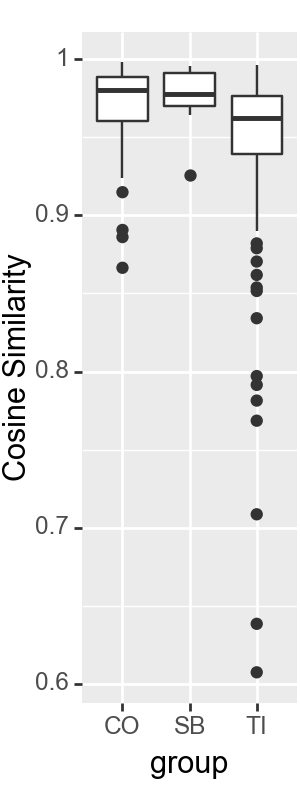

In [8]:
model_fit = best_decomp.plot_modelfit(gca_meta['site']).draw()
model_fit.set_size_inches(1.5, 4)
model_fit

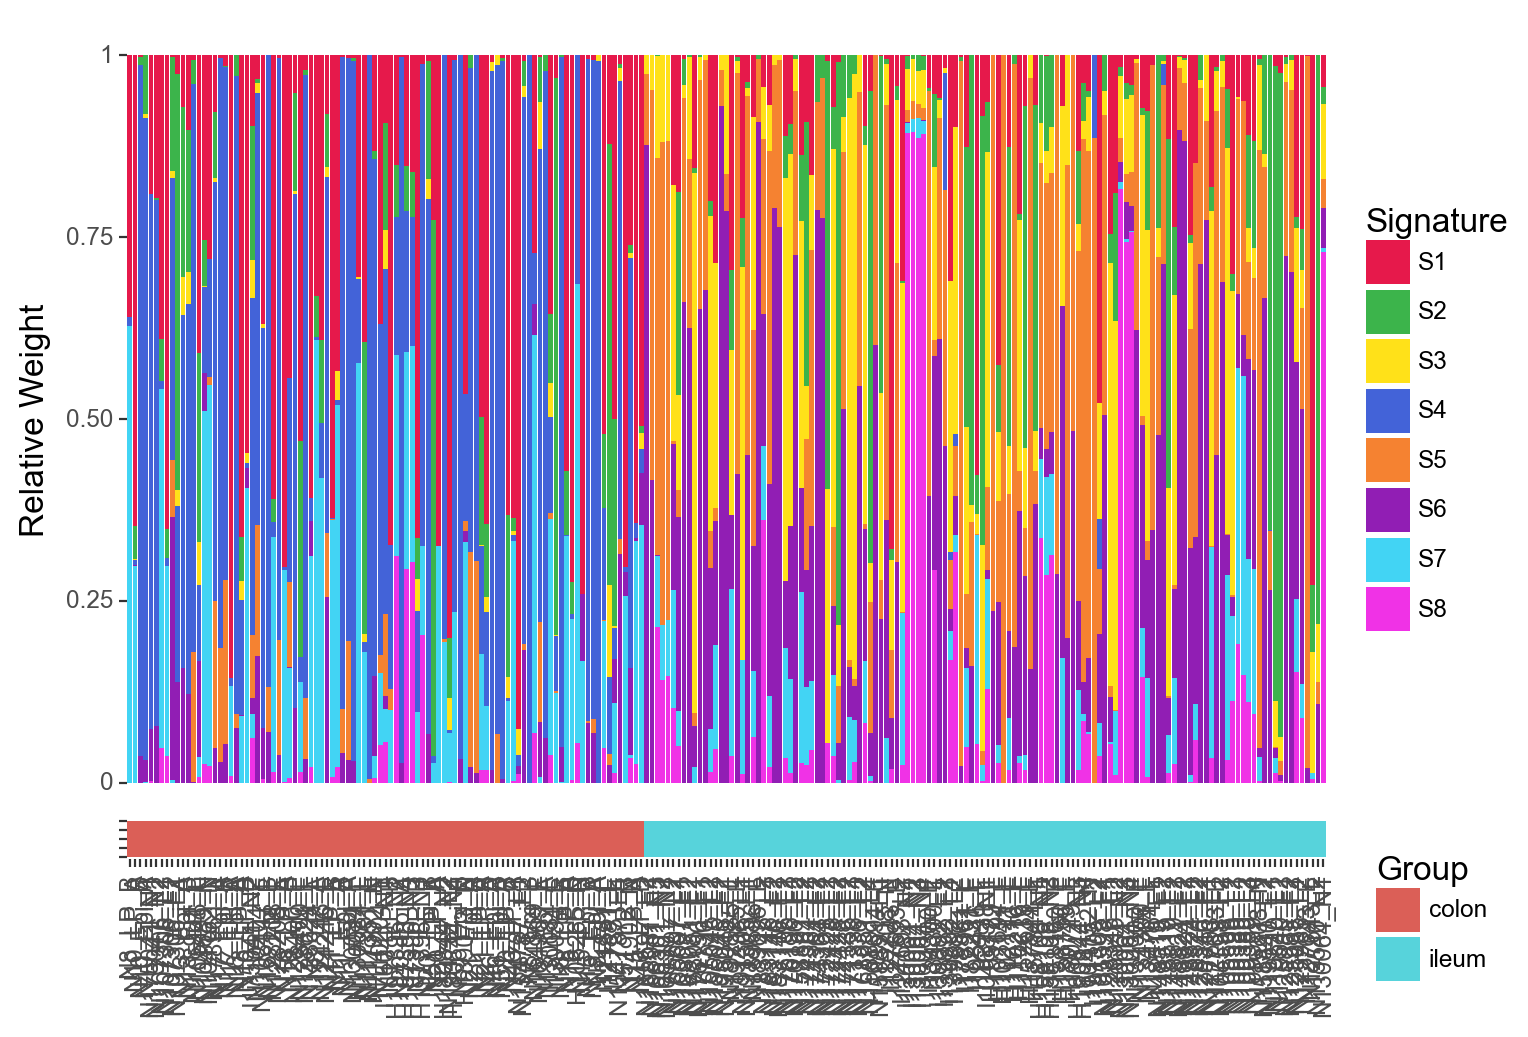

In [32]:
plt_ra = best_decomp.plot_relative_weight(group=gca_meta['organ__ontology_label'])
plt_ra

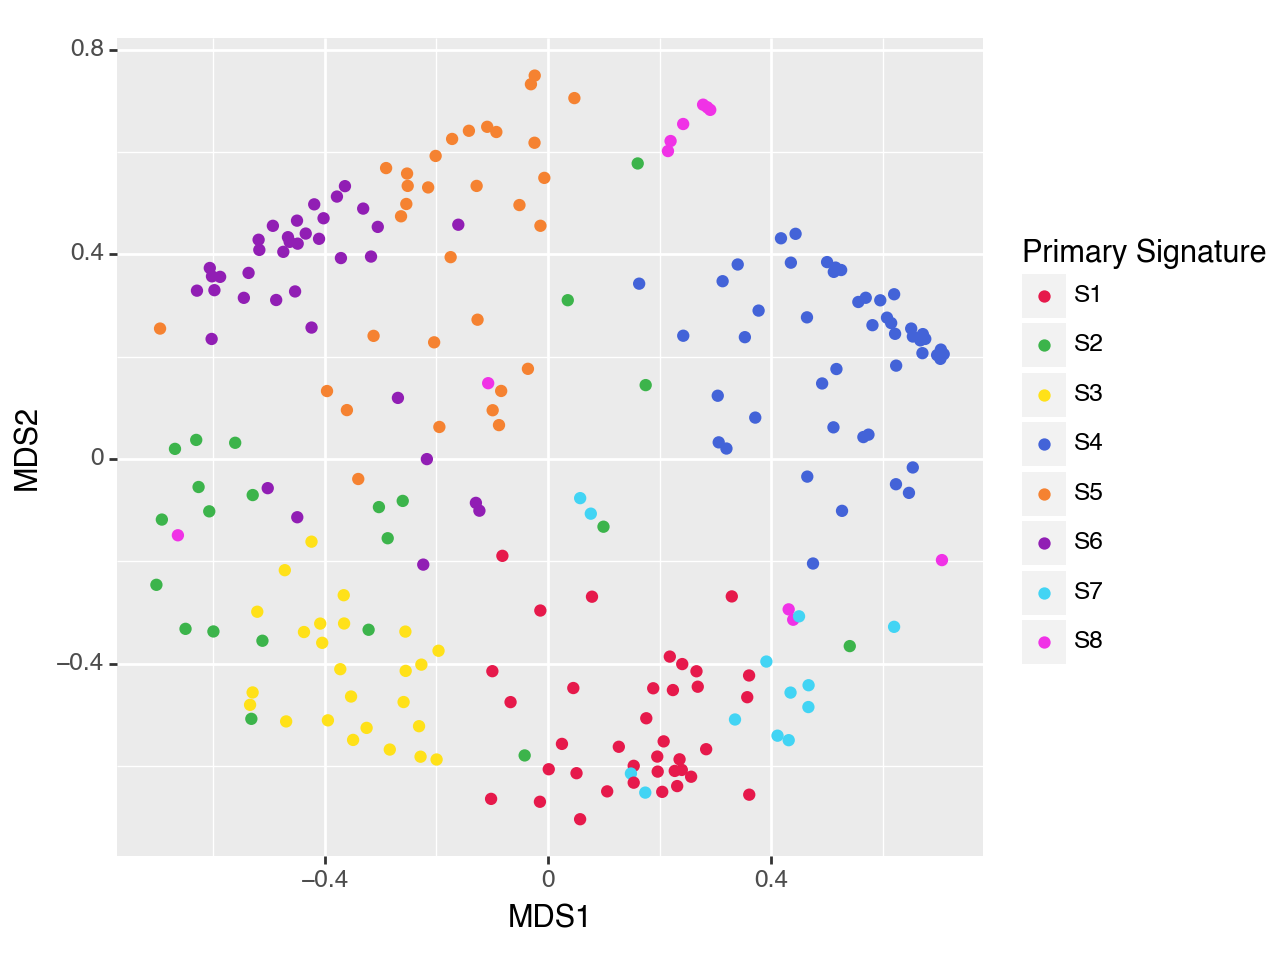

<Figure Size: (640 x 480)>

In [17]:
best_decomp.plot_pcoa()

In [11]:
best_decomp.representative_signatures(threshold=0.9)

,H101694_E,H101694_L,H102141_E,H102141_L,H106265_N,H110216_E,H110216_L,H139073_N,H152638_L,H157844_E,...,N46_LP_A,N46_LP_B,N51_Epi_A,N51_Epi_B,N51_LP_A,N51_LP_B,N8_Epi_A,N8_Epi_B,N8_LP_A,N8_LP_B
S1,False,True,False,True,False,False,True,True,True,False,...,True,True,False,False,True,True,False,False,True,True
S2,False,True,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
S3,False,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
S4,False,False,False,False,True,False,False,True,False,False,...,False,False,True,True,False,False,True,True,False,False
S5,True,True,True,True,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
S6,True,True,False,True,False,True,True,False,True,True,...,False,True,False,False,False,False,False,False,False,False
S7,False,False,False,True,True,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
S8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
best_decomp.monodominant_samples(threshold=0.9)

,is_monodominant,signature_name
H101694_E,False,NaN
H101694_L,False,NaN
H102141_E,True,S5
H102141_L,False,NaN
H106265_N,False,NaN
...,...,...
N51_LP_B,False,NaN
N8_Epi_A,True,S4
N8_Epi_B,True,S4
N8_LP_A,False,NaN


In [26]:
set(gca_meta['disease__ontology_label'])

{"Crohn's disease", 'normal'}